In [138]:
import json
import pandas as pd

In [139]:
def map_layer_no(layer_no):
    if layer_no == "-1":
        return "embed"
    elif layer_no == "12":
        return "full"
    else:
        return layer_no

In [140]:
with open("reranker_results_bm25plus.log") as f:
    data = []
    columns = None
    for i, line in enumerate(f):
        if i == 0:
            columns = list(map(str.strip, line.split(",")))
            continue
        if i == 29: break
        parts = line.split(",")
        layer = map_layer_no(parts[0])
        normalize = parts[1]
        pr = ",".join(parts[2:]).replace('{','')\
                                .replace('}','')\
                                .replace('\n','')\
                                .split(',')
        pr = [pri.replace(' ','').split(':') for pri in pr]
        p = {pi[0]: pi[1] for pi in pr[:5]}
        r = {ri[0]: ri[1] for ri in pr[5:]}
        data.append((layer,normalize,p, r))
        

In [141]:
df = pd.DataFrame(data, columns=columns)
A = pd.json_normalize(df['precision'].tolist()).add_prefix('precision@')
B = pd.json_normalize(df['recall'].tolist()).add_prefix('recall@')
df_pr = df.join([A,B]).drop(['precision', 'recall'], axis=1)

In [142]:
for column in df_pr.columns:
    if column.startswith('precision') or column.startswith('recall'):
        df_pr[column] = df_pr[column].astype(float)

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('/raid/lingo/akyurek/mplstyle')
plt.rc('font', serif='Times')
plt.rc('text', usetex=False)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.facecolor'] = 'white'

In [144]:
import os
os.makedirs('plots')

FileExistsError: [Errno 17] File exists: 'plots'

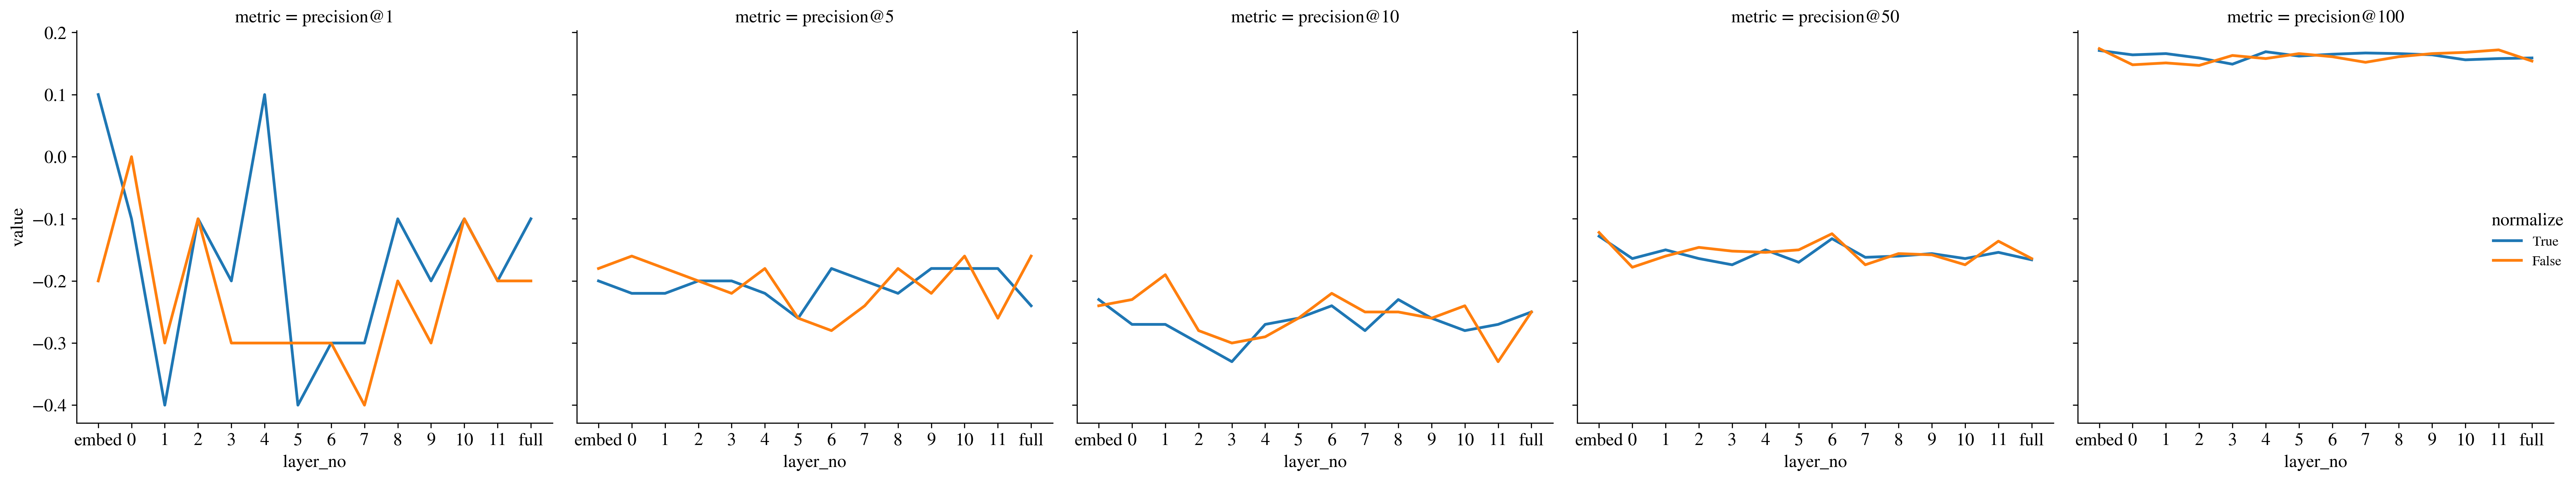

In [146]:
melted = df_pr.melt(id_vars=['layer_no', 'normalize'], value_vars=df_pr.columns[2:], var_name='metric', value_name='value')
sns.relplot(data=melted[melted['metric'].str.startswith('precision')], x="layer_no", col="metric", y="value", hue="normalize", kind="line")
plt.savefig('plots/precision_reranker_on_bm25.png')

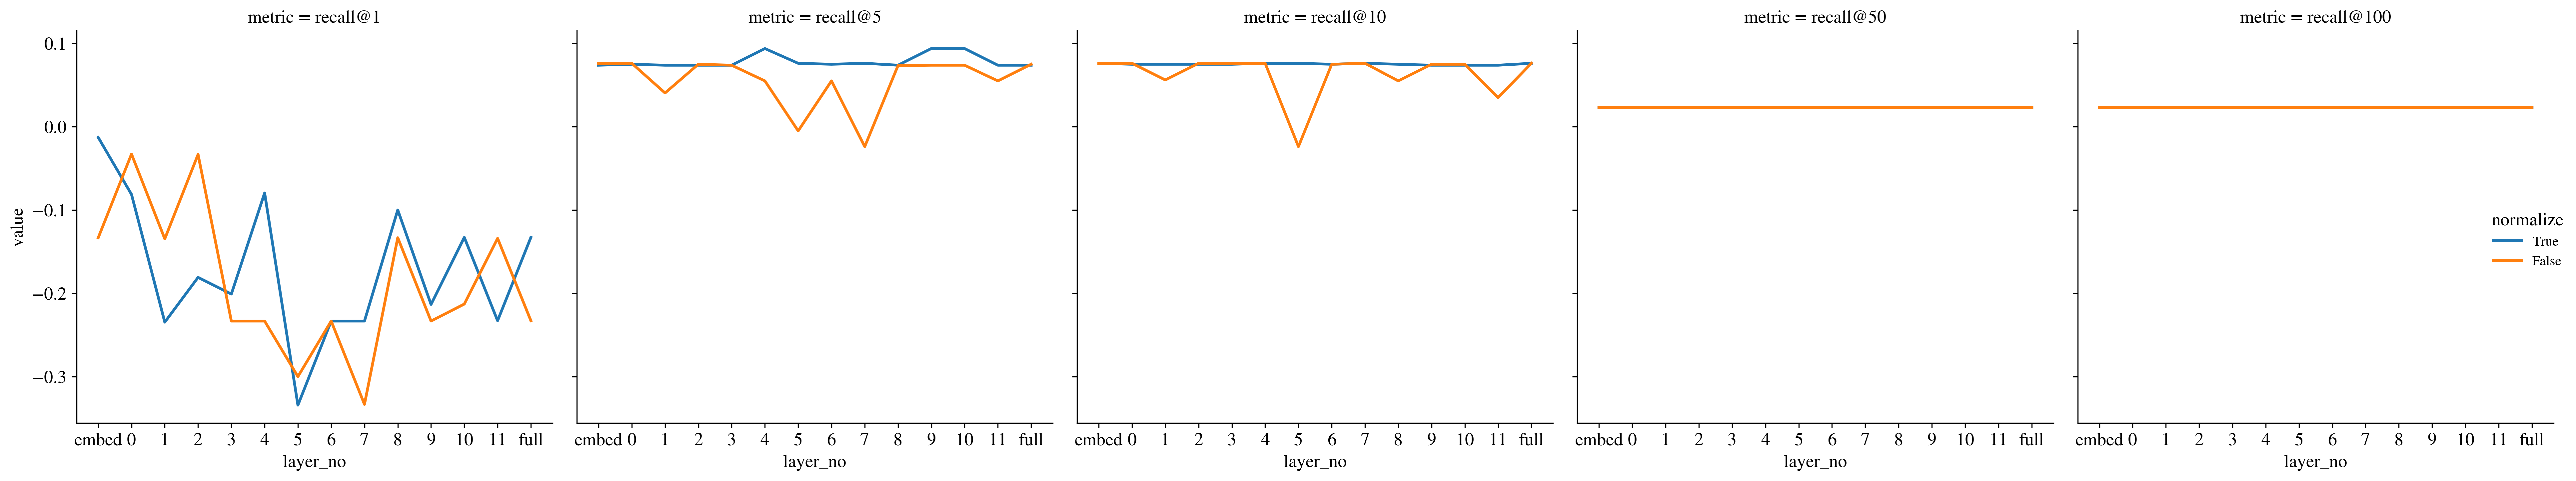

In [147]:
sns.relplot(data=melted[melted['metric'].str.startswith('recall')], x="layer_no", col="metric", y="value", hue="normalize", kind="line")
plt.savefig('plots/recal_reranker_on_bm25.png')